# Load Sample Data

In [1]:
import pandas as pd

In [2]:
# Load data from CSV files
df_a = pd.read_csv('../data/thermometer/thermo_a.csv')
df_b = pd.read_csv('../data/thermometer/thermo_b.csv')

# Concat in a single data frame
df_a['thermo'] = 'a'
df_b['thermo'] = 'b'
df = pd.concat([df_a, df_b])

# Drop unused columns
df = df.drop(columns=['note'])

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['time'])
df = df.drop(columns=['time'])

# Rename columns
df = df.rename(columns={'temperature(C)':'temp', 'humidity': 'hum'})

# Convert types of data columns
df['temp'] = df['temp'].str.replace(',', '.')
df['hum'] = df['hum'].str.replace(',', '.')
df = df.astype({
    'temp':'float',
    'hum':'float'
})

# Split up again for easier comparison of thermometers
df_a = df[df.thermo == 'a']
df_b = df[df.thermo == 'b']

display(df_a.tail(3))
display(df_b.tail(3))

,temp,hum,thermo,timestamp
1263,14.63,57.5,a,2023-01-07 11:27:05
1264,15.25,60.7,a,2023-01-07 11:37:05
1265,18.06,60.8,a,2023-01-07 11:47:05


,temp,hum,thermo,timestamp
1263,12.69,67.9,b,2023-01-07 11:22:00
1264,12.56,75.6,b,2023-01-07 11:32:00
1265,12.50,69.7,b,2023-01-07 11:42:00


# Define Plot Function

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [4]:
def plotly_draw_dual_axis(
    plot_title,
    x_axis_series,
    y_axis_1_series,
    y_axis_2_series,
    x_axis_title,
    y_axis_1_title,
    y_axis_2_title,
    y_axis_1_color        = '#e35424',
    y_axis_2_color        = '#3666e0',
    y_axis_1_line_width   = 2,
    y_axis_2_line_width   = 2,
    y_axis_1_mode         = 'lines',
    y_axis_2_mode         = 'lines',
    y_axis_1_fill         = False,
    y_axis_2_fill         = False,
    y_axis_1_front_layer  = False,
    y_axis_1_marker_style = dict(size=0, opacity=0.5),
    y_axis_2_marker_style = dict(size=0, opacity=0.5),
    y_axis_1_range        = None,
    y_axis_2_range        = None,
    x_axis_default_range  = '1d',
    plotly_theme          = 'ggplot2',
    export_fname_no_ext   = 'figure',
    export_dir            = 'plots',
    default_width         = 1200,
    default_height        = 700,
    plotly_renderer       = ''
):
    """Plots and exports a dual axis line chart including a range selector using Plotly.

    Parameters
    ----------
    plot_title : str
        Title text to display above the plot
    x_axis_series : pandas.core.series.Series
        Data for the x axis, i.e. a timestamp
    y_axis_1_series :
        Data for the primary (left) y axis
    y_axis_2_series :
        Data for the seconary (right) y axis
    x_axis_title :
        Title text to display below the x axis
    y_axis_1_title :
        Title text to display next to the primary y axis
    y_axis_2_title :
        Title text to display next to the secondary y axis
    y_axis_1_color
        Color of the trace of y axis 1 (line and fill) (default is '#e35424')
    y_axis_2_color
        Color of the trace of axis 2 (line and fill) (default is '#3666e0')
    y_axis_1_line_width
        Line width of the trace of axis 1 (default is 2)
    y_axis_2_line_width
        Line width of the trace of axis 2 (default is 2)
    y_axis_1_mode
        Mode of the trace of axis 1. Mode 'lines+markers' results in incorrectly scaled a range selector (https://github.com/plotly/plotly.js/issues/2209) (default is 2)
    y_axis_2_mode
        Mode of the trace of axis 2. Mode 'lines+markers' results in incorrectly scaled a range selector (https://github.com/plotly/plotly.js/issues/2209) (default is 2)
    y_axis_1_fill
        Whether to fill the area below the line of the trace of axis 1 (default is False)
    y_axis_2_fill
        Whether to fill the area below the line of the trace of axis 1 (default is False)
    y_axis_1_front_layer
        If True, the trace associated with axis 1 is plotted over the trace associated with axis 2 (default is False)
    y_axis_1_marker_style
        Style of the marker of the trace of axis 1 (default is: dict(size=0, opacity=0.5)). Only applies if y_axis_1_mode contains 'markers'
    y_axis_2_marker_style
        Style of the marker of the trace of axis 2 (default is: dict(size=0, opacity=0.5)). Only applies if y_axis_2_mode contains 'markers'
    y_axis_1_range
        Range plotted for axis 1 (default is None). The default setting automatically picks a range that displays all data
    y_axis_2_range
        Range plotted for axis 12(default is None). The default setting automatically picks a range that displays all data
    x_axis_default_range
        Default time range of data displayed in the exported image files and initially displayed in the interactive HTML plot (default is '1d')
    plotly_theme
        Plotly theme used for the plot (default is 'ggplot2')
    export_fname_no_ext
        Filename used for exported images (default is 'figure')
    export_dir
        Directory to export the images to (default is 'plots')
    default_width
        Width used for display in notebook and export to files (default is 1000)
    default_height
        Height used for display in notebook and export to files (default is 700)
    plotly_renderer
        Renderer to be used for displaying the plot (default is ''). Get supported renderers via: import plotly.io; plotly.io.renderers. On GitHub, HTML/JS rendering is not supported.

    Returns
    -------
    None
    """

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(
            x      = x_axis_series,
            y      = y_axis_1_series,
            name   = y_axis_1_title,
            mode   = y_axis_1_mode,
            line   = dict(color=y_axis_1_color, width=y_axis_1_line_width),
            marker = y_axis_1_marker_style,
            fill   = 'tozeroy' if y_axis_1_fill == True else None
        ),
        secondary_y = y_axis_1_front_layer
    )

    fig.add_trace(
        go.Scatter(
            x      = x_axis_series,
            y      = y_axis_2_series,
            name   = y_axis_2_title,
            mode   = y_axis_2_mode,
            line   = dict(color=y_axis_2_color, width=y_axis_2_line_width),
            marker = y_axis_2_marker_style,
            fill   = 'tozeroy' if y_axis_2_fill == True else None
        ),
        secondary_y = not y_axis_1_front_layer
    )

    # Modify style
    fig.update_layout(
        title_text = plot_title,
        height     = default_height,
        template   = plotly_theme,
        legend     = dict(
            orientation ='h',
            xanchor ='center',
            x       = .5,
            yanchor = 'top',
            y       = 1.09
        )
    )

    # Calculate default range to be displayed
    default_range_end   = x_axis_series.max()
    default_range_start = default_range_end - pd.Timedelta(x_axis_default_range)
    default_range       = [default_range_start, default_range_end]

    # Add range slider
    fig.update_layout(
        xaxis = dict(
            rangeselector = dict(
                buttons = list([
                    dict(count    = 1,
                         label    = "1d",
                         step     = "day",
                         stepmode ="backward"),
                    dict(count    = 1,
                         label    = "1m",
                         step     = "month",
                         stepmode = "backward"),
                    dict(count    = 6,
                         label    = "6m",
                         step     = "month",
                         stepmode = "backward"),
                    dict(count    = 1,
                         label    = "1y",
                         step     = "year",
                         stepmode = "backward"),
                    dict(
                        step      ="all"
                    ),
                ])
            ),
            rangeslider = dict(
                visible = True,
            ),
            type  = "date",
            range = default_range,
        )
    )

    # Set x-axis title
    fig.update_xaxes(title_text=x_axis_title)
    
    # Configure y axes
    fig.update_yaxes(
        title_text  = y_axis_1_title,
        secondary_y = False,
        autorange   = False if y_axis_1_range else True,
        range       = y_axis_1_range
    )
    fig.update_yaxes(
        title_text  = y_axis_2_title,
        secondary_y = True,
        autorange   = False if y_axis_2_range else True,
        range       = y_axis_2_range
    )
    
    # Display figure in notebook
    fig.show(plotly_renderer, width=default_width, height=default_height, scale=2)
    
    # Create directory for exports if not existent
    export_dir = export_dir.strip("/").strip("\\")
    if not os.path.exists(export_dir):
        os.makedirs(export_dir)
    
    # Export plot to file
    fig.write_image(export_dir + '/' + export_fname_no_ext + '.png', width=default_width, height=default_height, scale=2)
    fig.write_html(export_dir + '/' + export_fname_no_ext + '.html', default_height=default_height, include_plotlyjs='cdn')

# Examples

## Temperatur & Humidity (Thermo A)

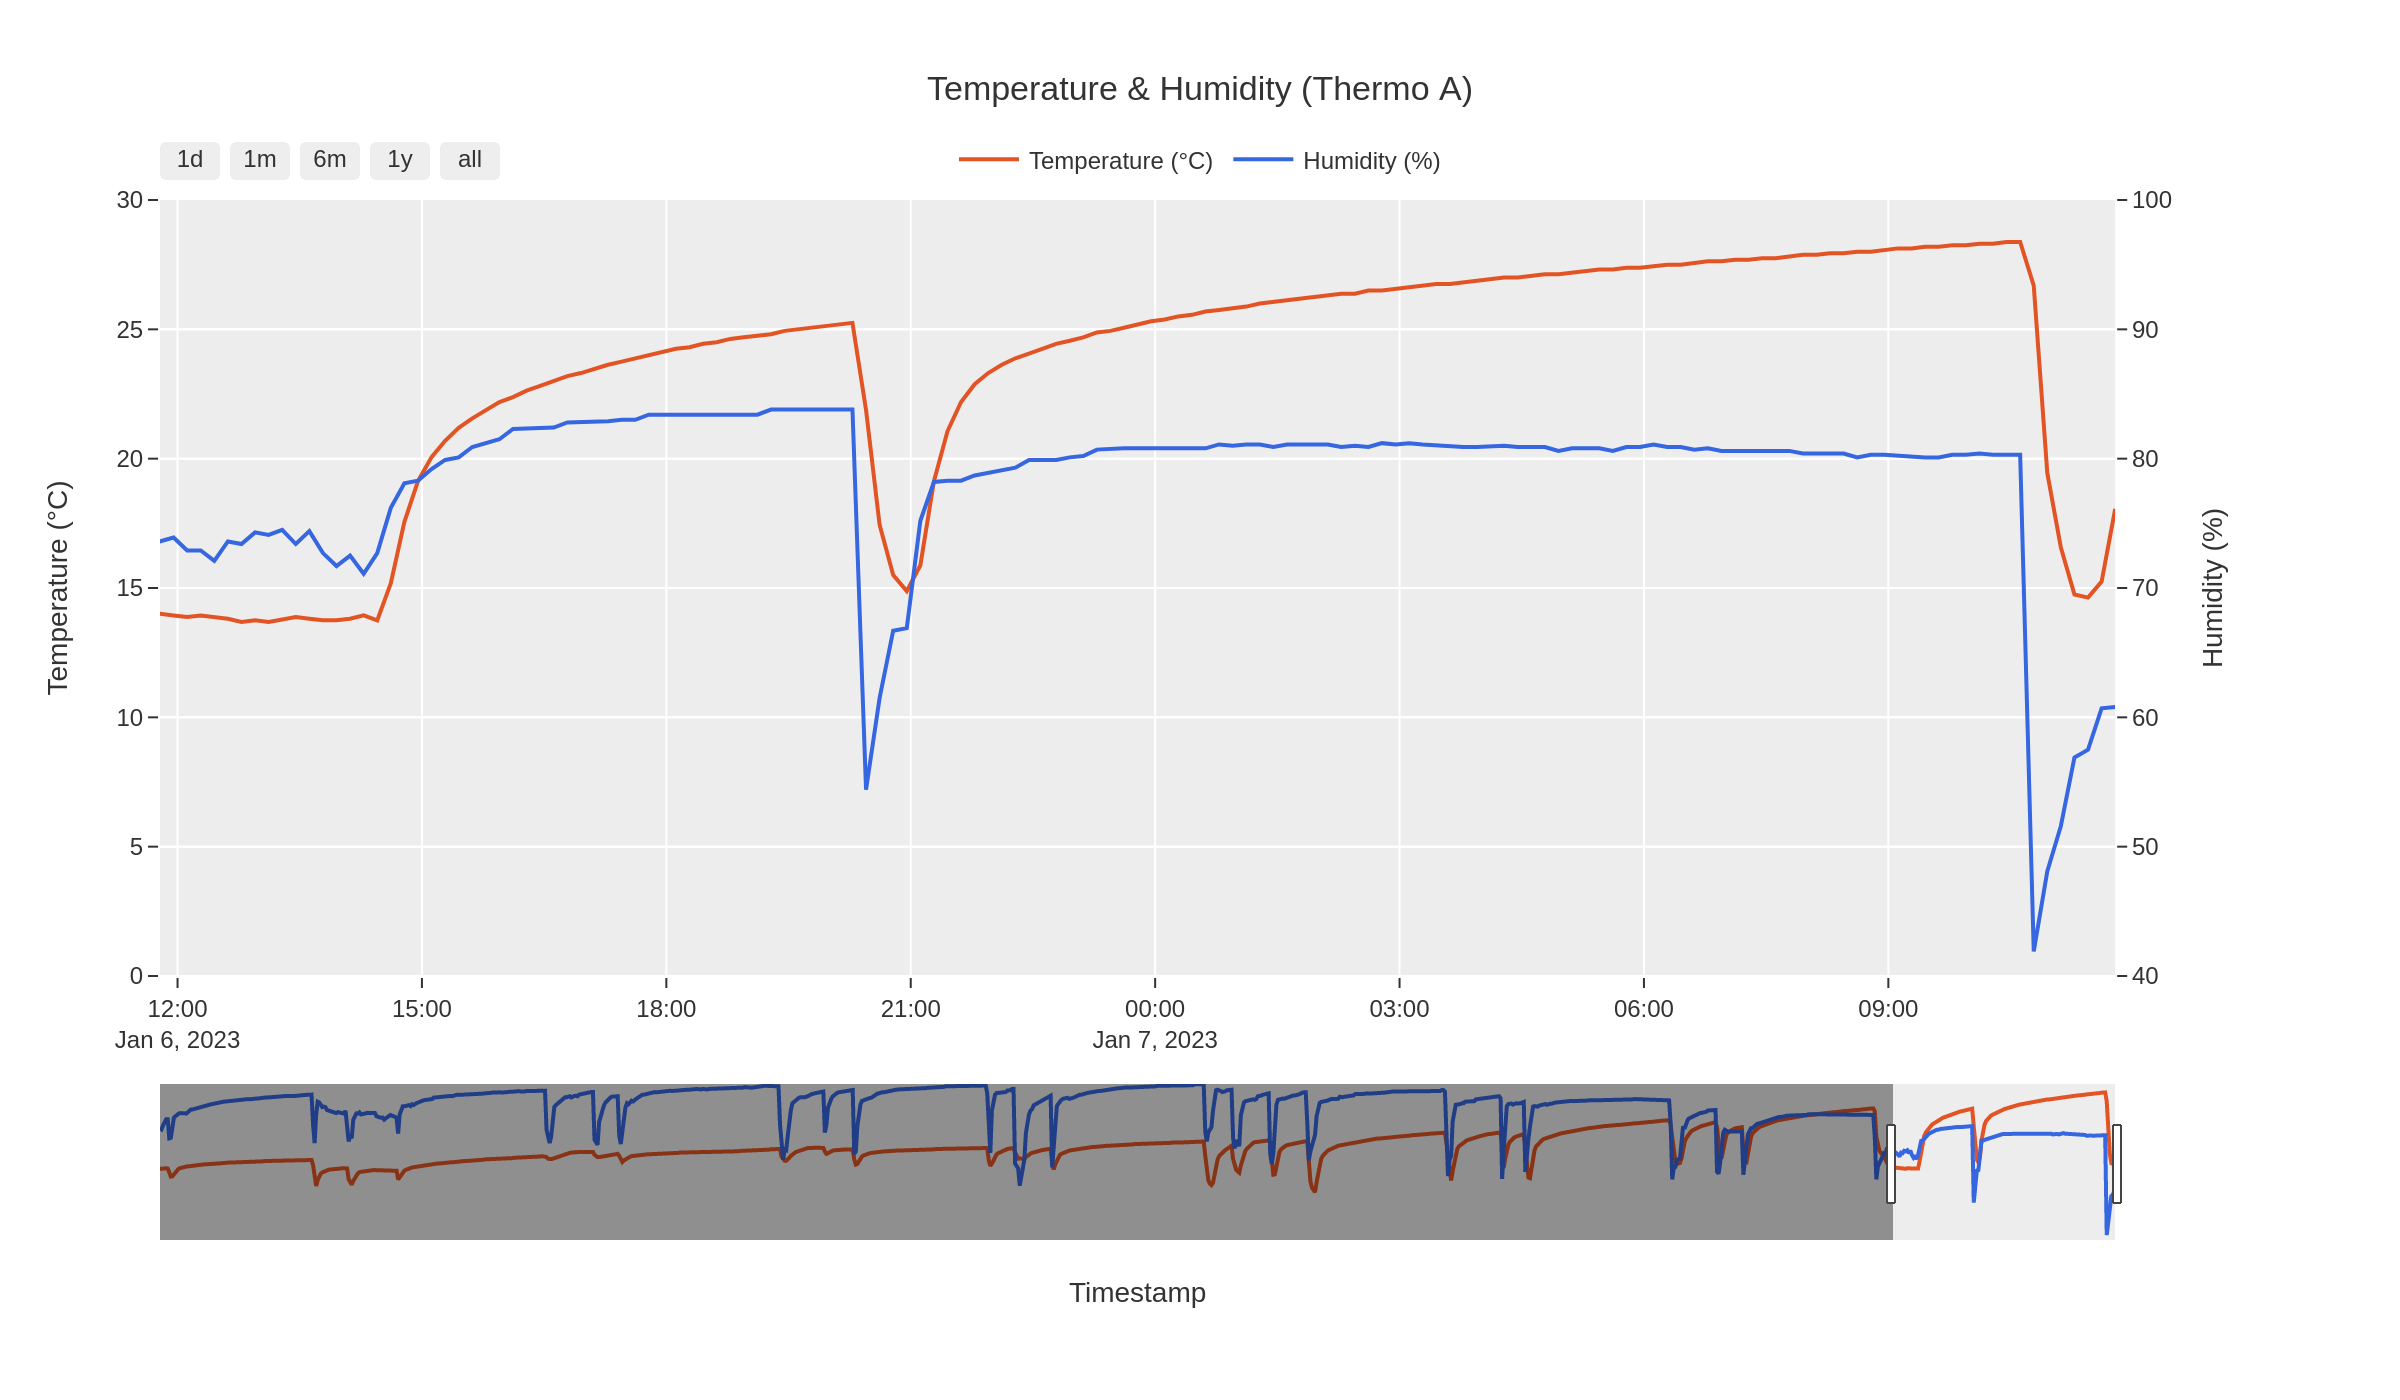

In [5]:
plotly_draw_dual_axis(
    plotly_renderer     = 'png',
    x_axis_series       = df_a.timestamp,
    y_axis_1_series     = df_a.temp,
    y_axis_2_series     = df_a.hum,
    x_axis_title        = 'Timestamp',
    y_axis_1_title      = 'Temperature (°C)',
    y_axis_2_title      = 'Humidity (%)',
    plot_title          = 'Temperature & Humidity (Thermo A)',
    y_axis_1_range      = [0,30],
    y_axis_2_range      = [40,100],
    export_fname_no_ext = 'thermo_a',
)

## Temperatur & Humidity (Thermo B)

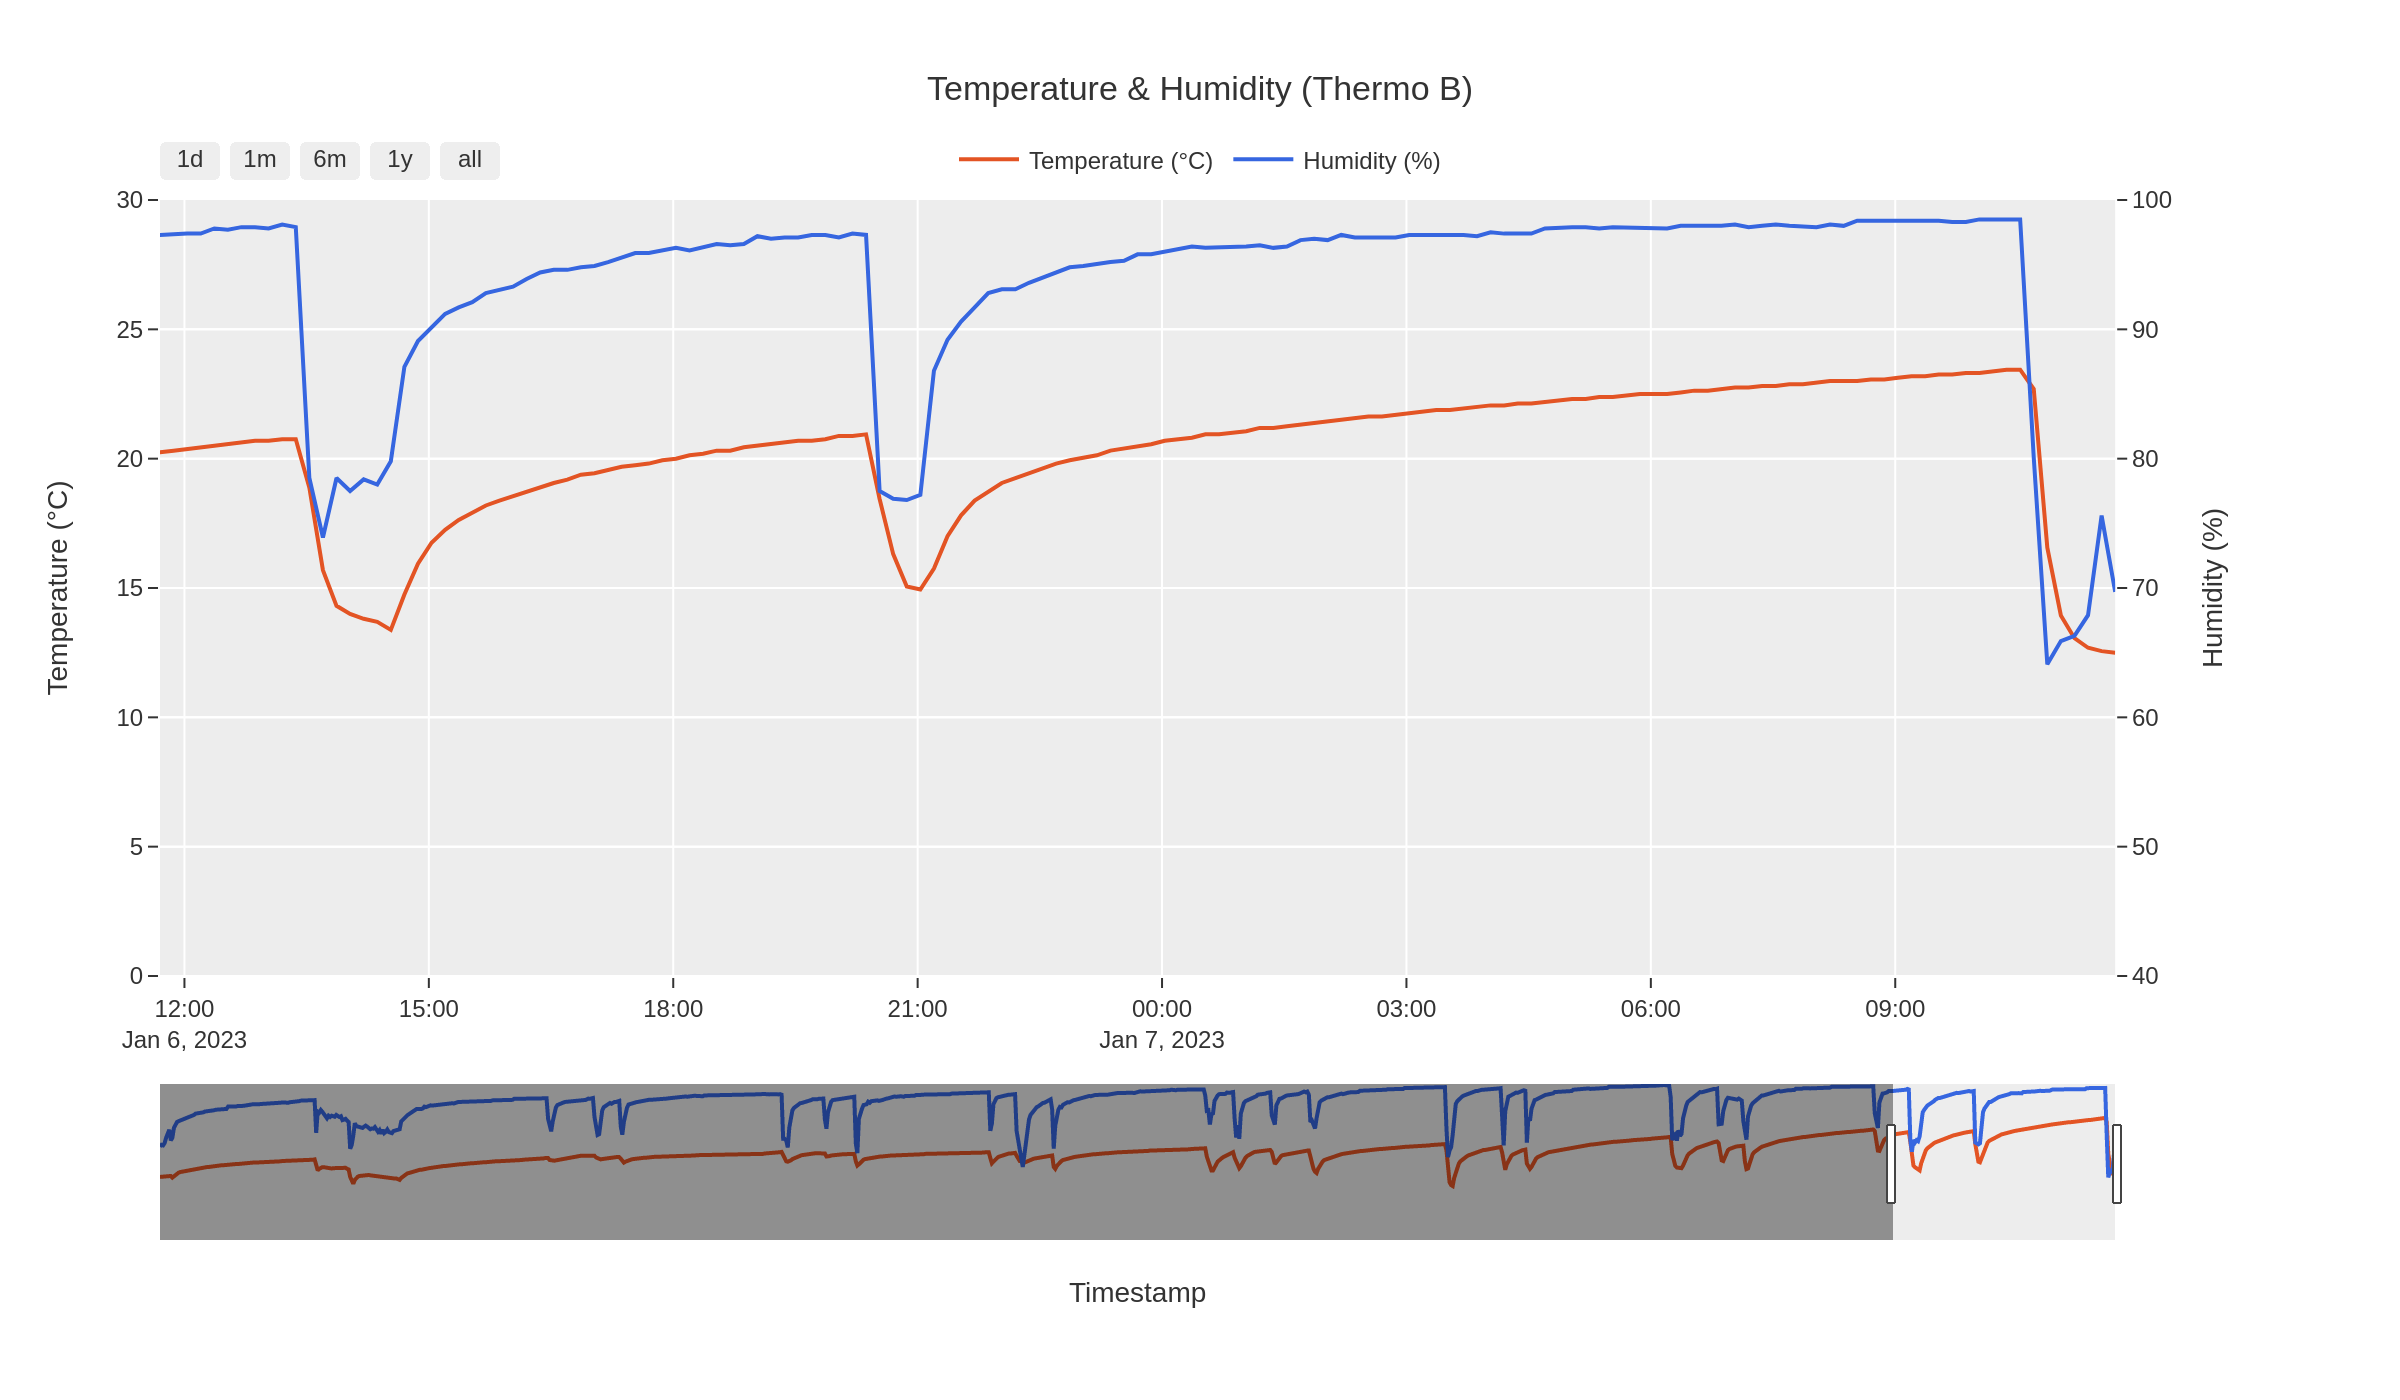

In [6]:
plotly_draw_dual_axis(
    plotly_renderer      = 'png',
    x_axis_series       = df_b.timestamp,
    y_axis_1_series     = df_b.temp,
    y_axis_2_series     = df_b.hum,
    x_axis_title        = 'Timestamp',
    y_axis_1_title      = 'Temperature (°C)',
    y_axis_2_title      = 'Humidity (%)',
    plot_title          = 'Temperature & Humidity (Thermo B)',
    y_axis_1_range      = [0,30],
    y_axis_2_range      = [40,100],
    export_fname_no_ext = 'thermo_b',
)

## Temperature (Thermo A vs Thermo B)

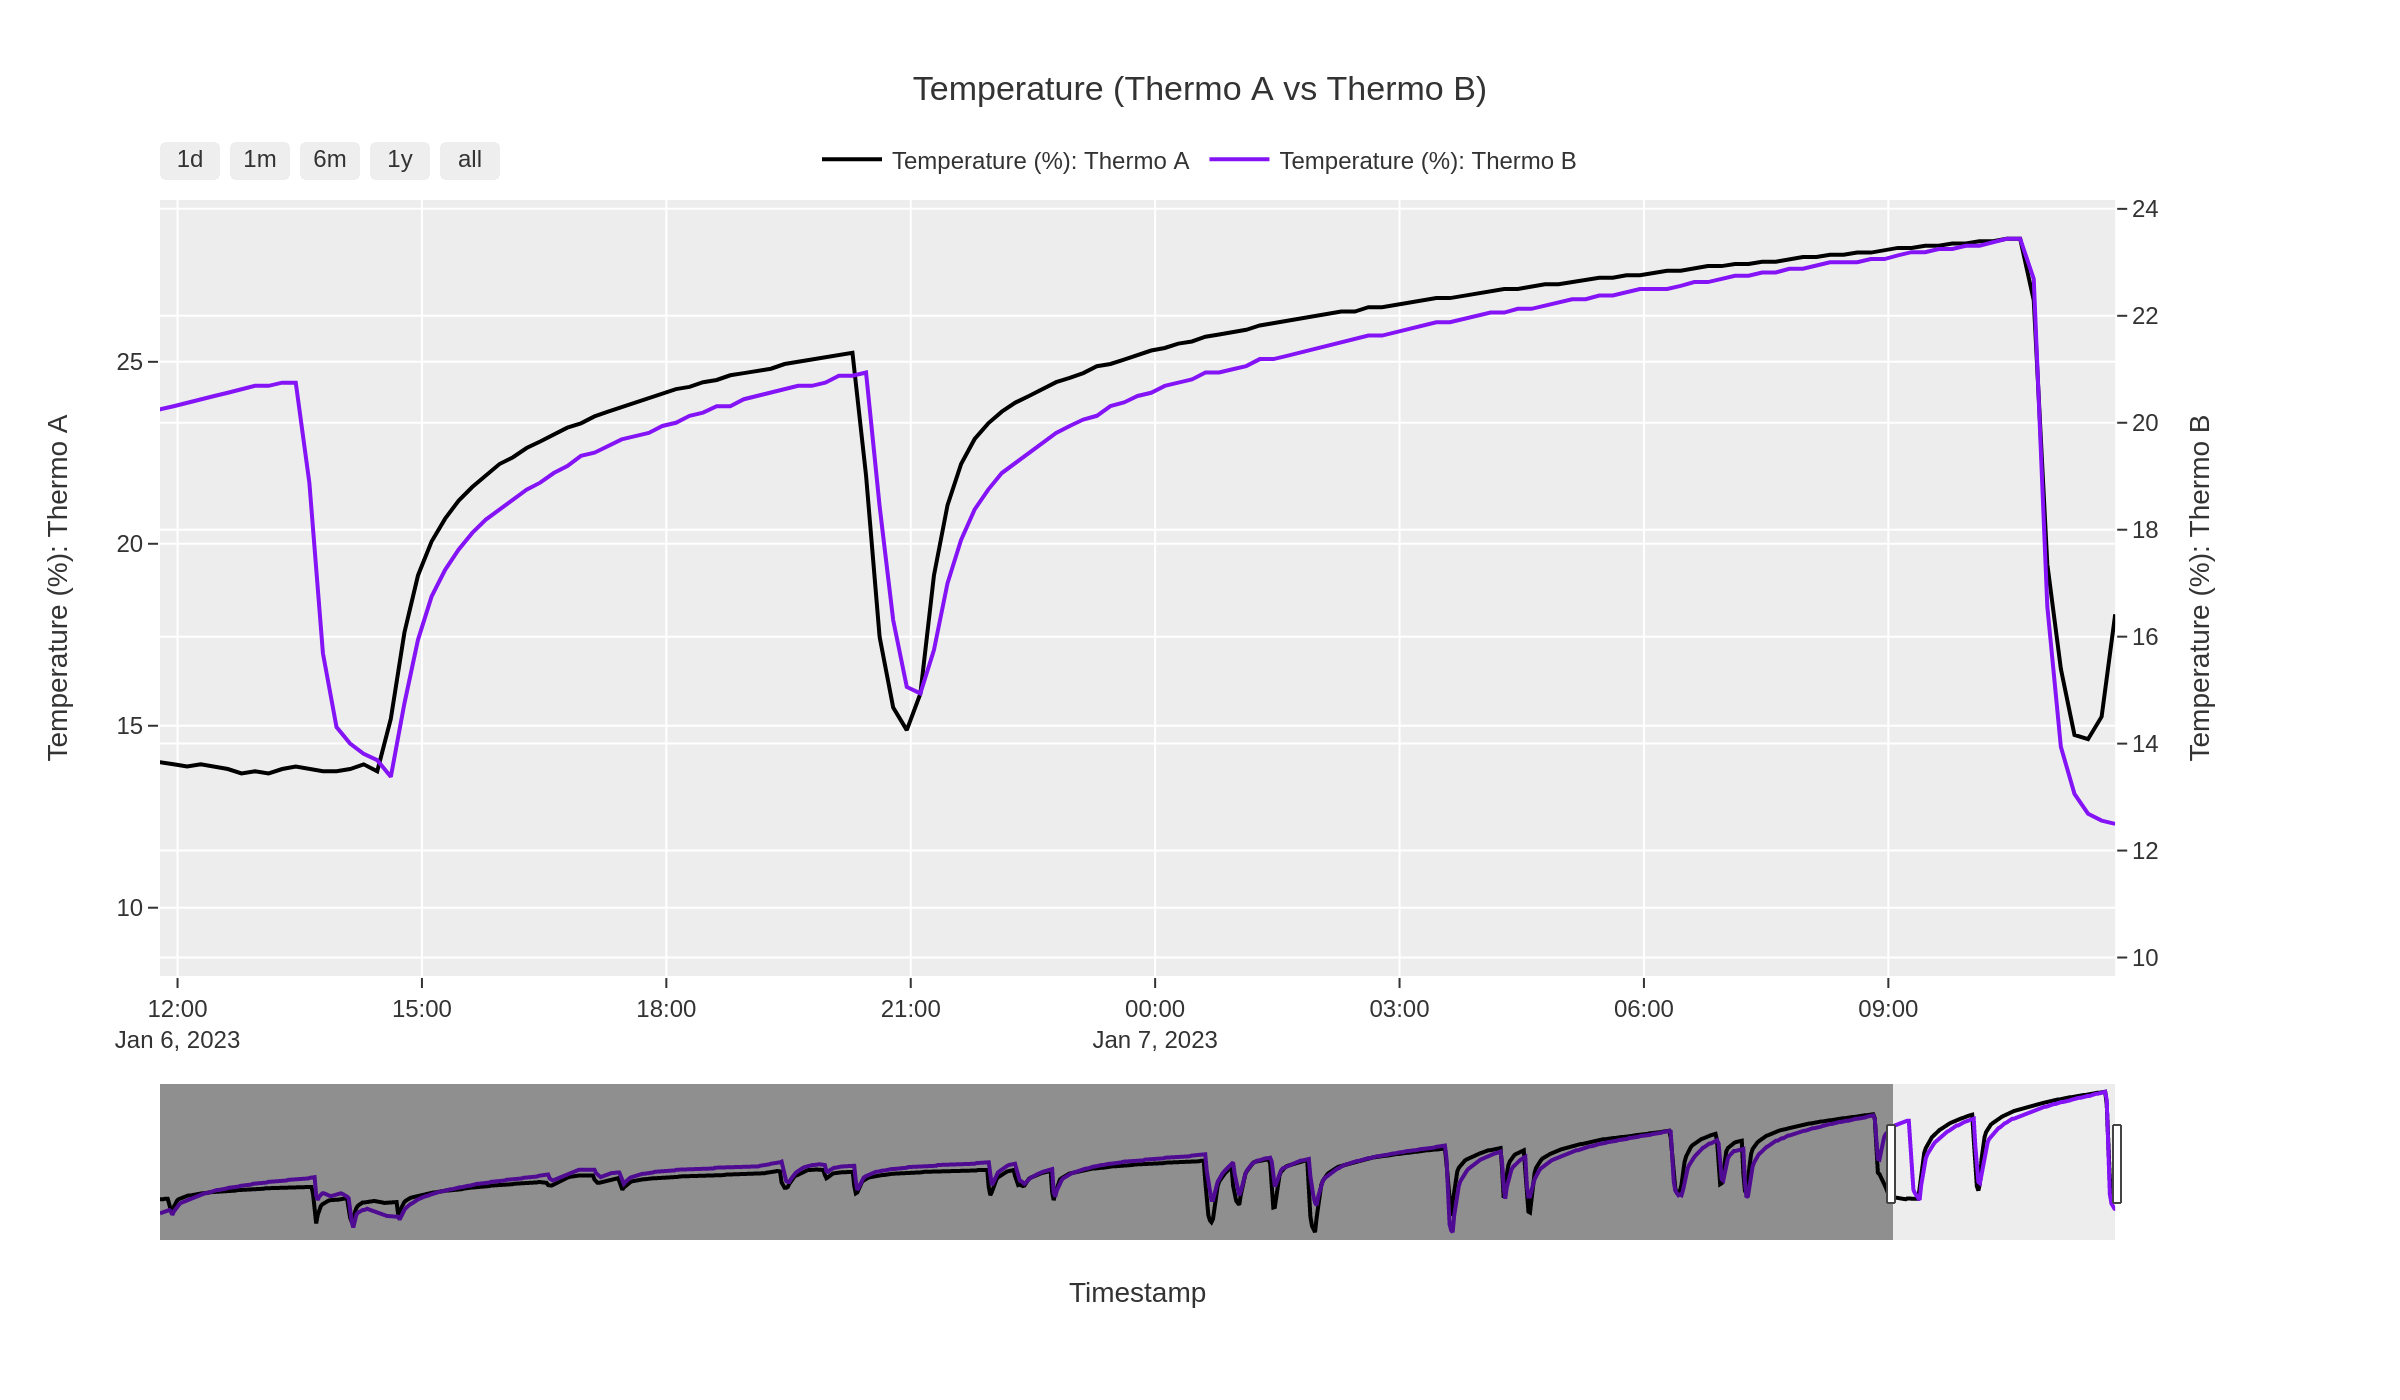

In [7]:
plotly_draw_dual_axis(
    plotly_renderer     = 'png',
    x_axis_series       = df_a.timestamp,
    y_axis_1_series     = df_a.temp,
    y_axis_2_series     = df_b.temp,
    x_axis_title        = 'Timestamp',
    y_axis_1_title      = 'Temperature (%): Thermo A',
    y_axis_2_title      = 'Temperature (%): Thermo B',
    plot_title          = 'Temperature (Thermo A vs Thermo B)',
    export_fname_no_ext = 'temperature',
    y_axis_1_color      = '#000000',
    y_axis_2_color      = '#8414f5',
)

## Humidity (Thermo A vs Thermo B) With Filled Layers

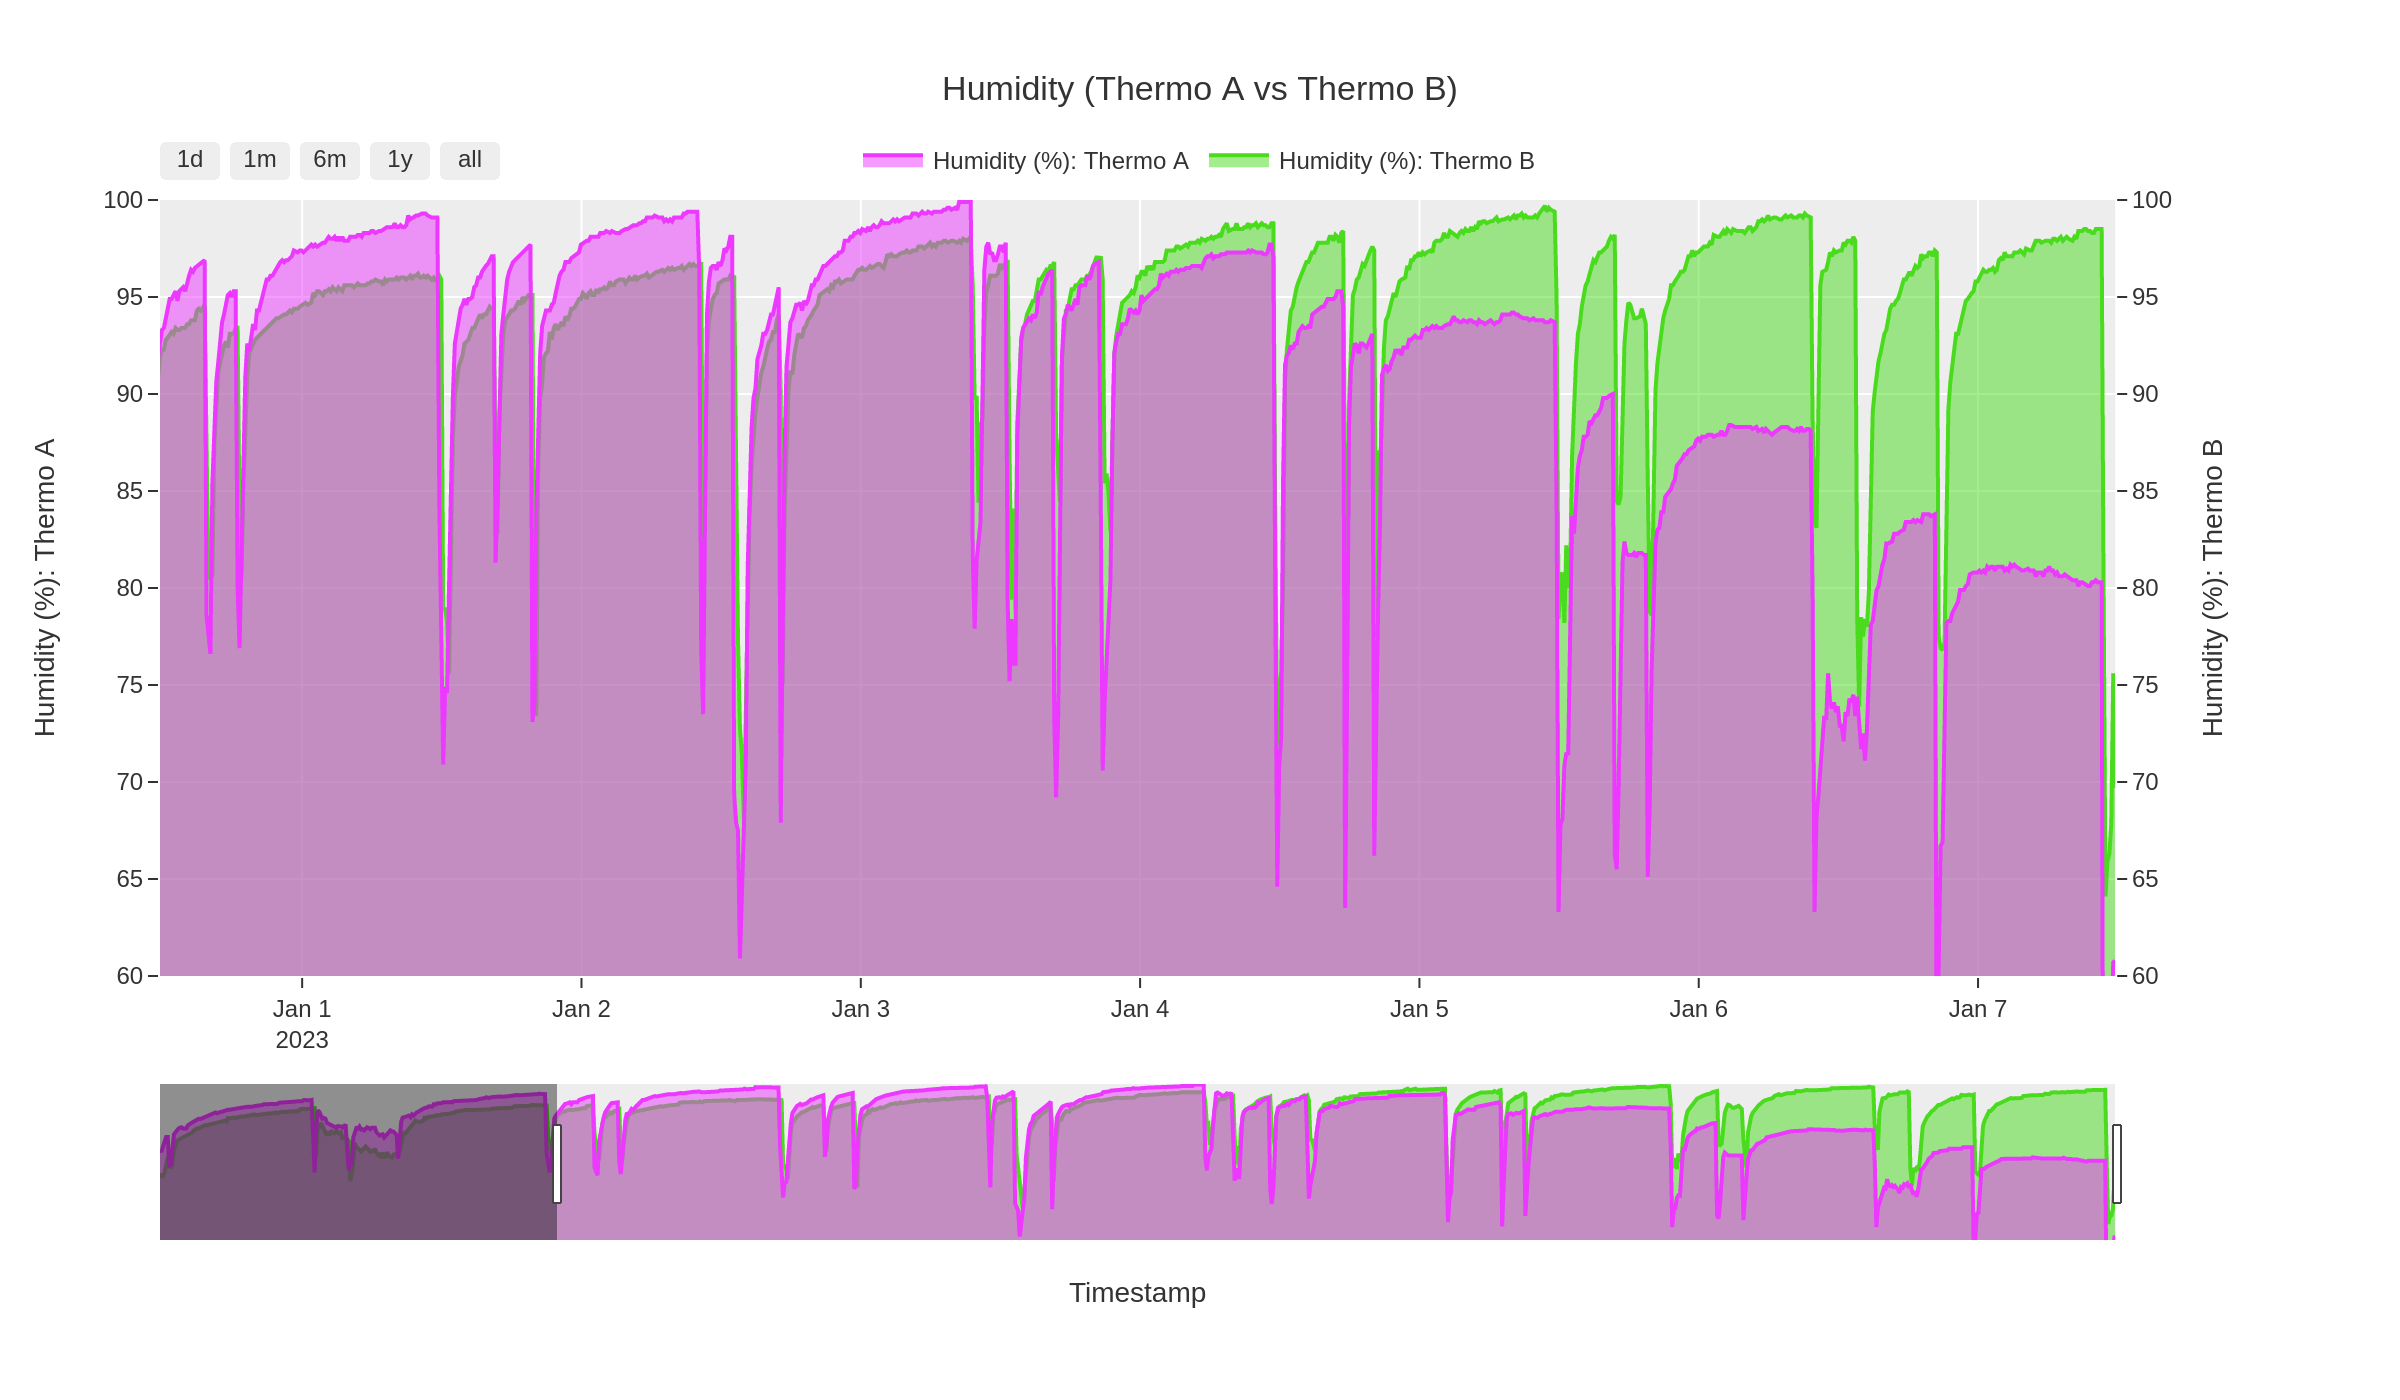

In [8]:
plotly_draw_dual_axis(
    plotly_renderer      = 'png',
    x_axis_series        = df_a.timestamp,
    y_axis_1_series      = df_a.hum,
    y_axis_2_series      = df_b.hum,
    x_axis_title         = 'Timestamp',
    y_axis_1_title       = 'Humidity (%): Thermo A',
    y_axis_2_title       = 'Humidity (%): Thermo B',
    plot_title           = 'Humidity (Thermo A vs Thermo B)',
    export_fname_no_ext  = 'filled_layers',
    y_axis_1_color       = '#EC38FF',
    y_axis_2_color       = '#4ADB1E',
    x_axis_default_range = '7d',
    y_axis_1_front_layer = True,
    y_axis_1_fill        = True,
    y_axis_2_fill        = True,
    y_axis_1_range       = [60,100],
    y_axis_2_range       = [60,100],
)

## Temperature (Thermo B) With Smoothing

In [9]:
from scipy import signal

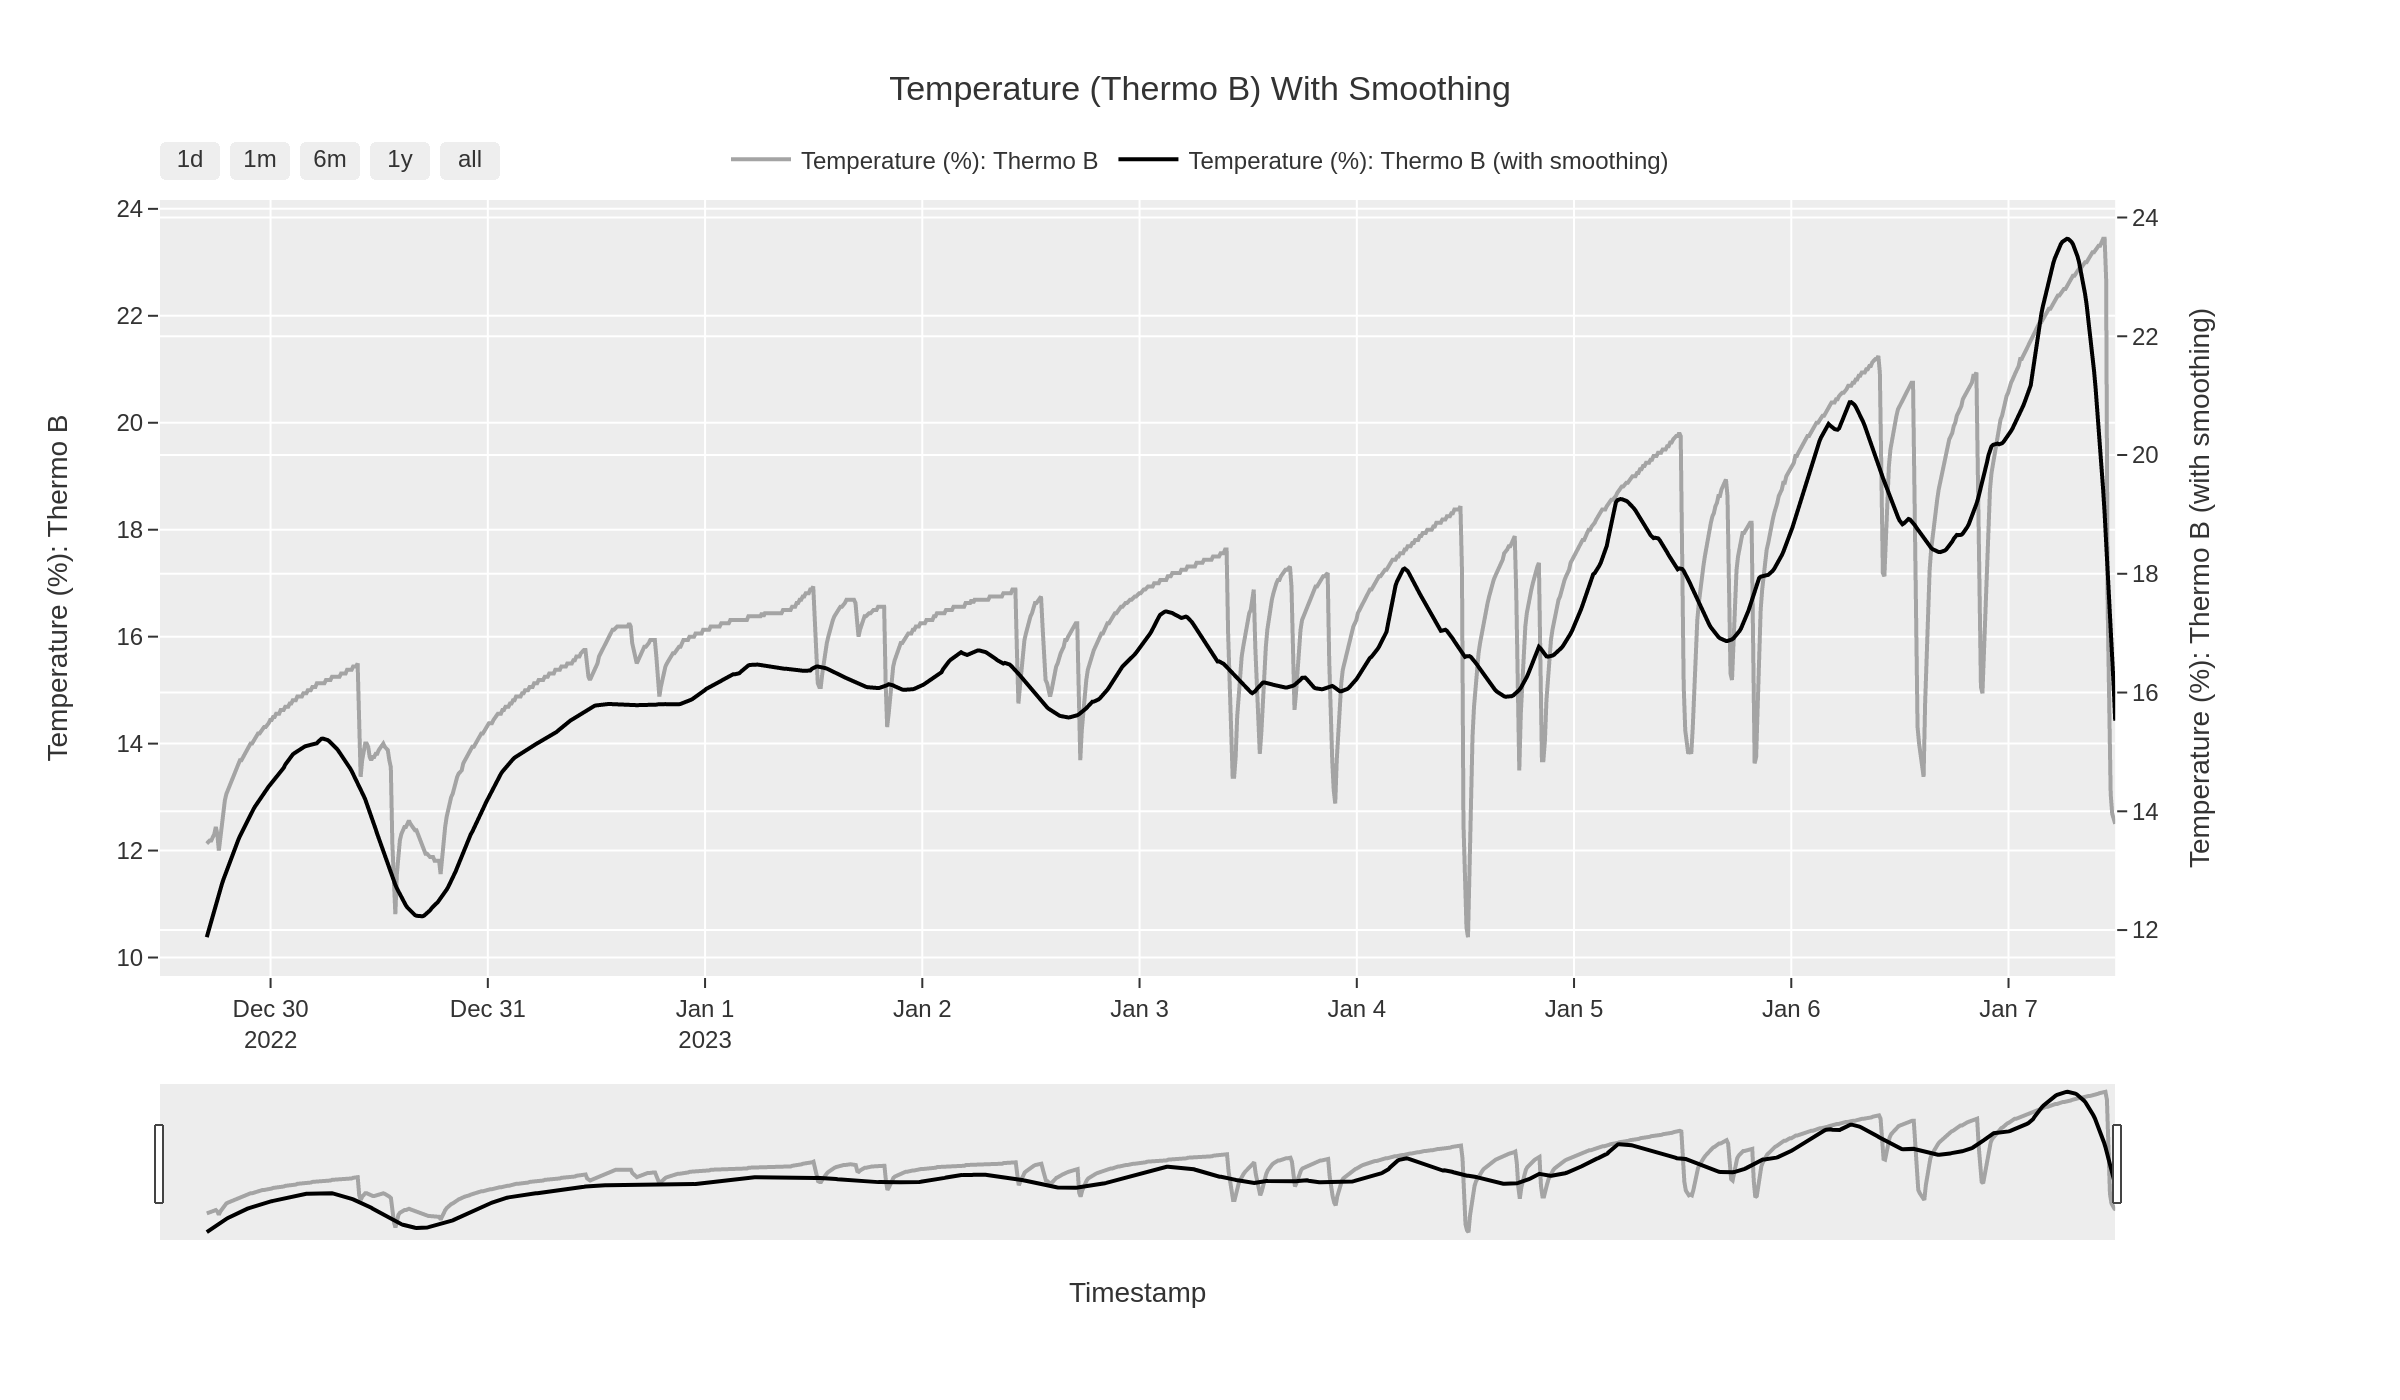

In [10]:
plotly_draw_dual_axis(
    plotly_renderer      = 'png',
    x_axis_series        = df_a.timestamp,
    y_axis_1_series      = df_b.temp,
    y_axis_2_series      = signal.savgol_filter(x=df_b.temp, window_length=100, polyorder=3),
    x_axis_title         = 'Timestamp',
    y_axis_1_title       = 'Temperature (%): Thermo B',
    y_axis_2_title       = 'Temperature (%): Thermo B (with smoothing)',
    plot_title           = 'Temperature (Thermo B) With Smoothing',
    export_fname_no_ext  = 'temperature_smoothing',
    y_axis_1_color       = '#A4A4A4',
    y_axis_2_color       = '#000000',
    x_axis_default_range = '9d',
)